Problem 2.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Problem 3.

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
file_path = "/content/gdrive/My Drive/Colab Notebooks/PatientDataCOVID19.csv"
data = pd.read_csv(file_path, na_values=['NotAvailable'])

Problem 4.

In [0]:
data.tail(10)

,Age,Sex,City,State,AdminDivision,Country,GeoPosX,GeoPosY,DateOfOnsetSymptoms,DateOfAdmissionHospital,DateOfConfirmation,Symptoms,LivesInWuhan,LivesInWuhanComment,TravelHistoryDateStart,TravelHistoryDateEnd,ReportedMarketExposure,ReportedMarketExposureComment,ChronicDisease,ChronicDiseaseTypes,SequenceAvailable,Discharged,Death,DateOfDeath,DateOfDischarge
17724,70.0,Female,NaN,NaN,Washington,UnitedStates,47.491332,-121.803640,NaN,NaN,03-04-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FALSE,NaN,NaN,NaN,NaN,NaN,NaN
17725,50.0,NaN,NaN,NaN,Washington,UnitedStates,46.920447,-122.830710,NaN,NaN,03-11-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FALSE,NaN,NaN,NaN,NaN,NaN,NaN
17726,80.0,NaN,NaN,NaN,Washington,UnitedStates,47.209186,-119.450230,NaN,02-29-2020,03-04-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FALSE,NaN,NaN,NaN,NaN,NaN,03-08-2020
17727,20.0,Male,NaN,NaN,Washington,UnitedStates,48.479711,-121.727390,NaN,NaN,03-11-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FALSE,NaN,NaN,NaN,NaN,NaN,NaN
17728,60.0,Male,NaN,NaN,Nevada,UnitedStates,36.219214,-115.018570,NaN,NaN,03-11-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FALSE,NaN,NaN,NaN,NaN,NaN,NaN
17729,39.0,Female,NewYork,NewYork,NewYork,UnitedStates,40.661000,-73.944000,NaN,NaN,03-02-2020,mildsymptoms,NaN,NaN,02-25-2020,02-25-2020,NaN,NaN,FALSE,NaN,NaN,NaN,NaN,NaN,NaN
17730,40.0,Male,NaN,NaN,NewYork,UnitedStates,40.876838,-72.858595,NaN,NaN,03-08-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FALSE,NaN,NaN,NaN,NaN,NaN,NaN
17731,46.0,Female,NewRochelle,NewYork,NewYork,UnitedStates,40.908610,-73.781900,NaN,NaN,03-04-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FALSE,NaN,NaN,NaN,NaN,NaN,NaN
17732,45.0,Male,NewRochelle,NewYork,NewYork,UnitedStates,40.908610,-73.781900,NaN,NaN,03-04-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FALSE,NaN,NaN,NaN,NaN,NaN,NaN
17733,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Problem 5.

In [0]:
data5 = data['Country'].dropna()

In [0]:
len(data5.unique())

109

In [0]:
data5.unique()

array(['China', 'Japan', 'Thailand', 'Nepal', 'SouthKorea', 'Australia',
       'UnitedStates', 'Vietnam', 'Philippines', 'France', 'Singapore',
       'Canada', 'Germany', 'Finland', 'Cambodia', 'Mexico', 'Malaysia',
       'Italy', 'Pakistan', 'Brazil', 'Croatia', 'Spain', 'Switzerland',
       'Romania', 'Portugal', 'Tunisia', 'Iceland', 'Chile',
       'SouthAfrica', 'Bhutan', 'Argentina', 'Malta', 'Bolivia',
       'Nigeria', 'Namibia', 'Guatemala', 'Algeria', 'Gambia',
       'UnitedKingdom', 'UnitedArabEmirates', 'Lebanon', 'Macedonia',
       'Kuwait', 'Greece', 'Oman', 'Afghanistan', 'Austria', 'SanMarino',
       'Norway', 'Georgia', 'Iraq', 'Bahrain', 'Netherlands', 'Estonia',
       'Sweden', 'Israel', 'Lithuania', 'Ecuador', 'Senegal', 'Latvia',
       'SaudiArabia', 'Russia', 'Qatar', 'Jordan', 'Belgium', 'Andorra',
       'India', 'CzechRepublic', 'Ukraine', 'Morocco', 'Ireland',
       'NewZealand', 'Liechtenstein', 'Gibraltar', 'Poland', 'Slovenia',
       'Azerbaijan'

Problem 6.

In [0]:
data_male = data[data['Sex']=='Male']
data_male.shape[0]

8896

In [0]:
data_female = data[data['Sex']=='Female']
data_female.shape[0]

6906

Problem 7.

In [0]:
data7 = data[data['Country']=='SouthKorea']
data7 = data7.dropna(subset=['Symptoms'])
data7 = data7[data7['Symptoms'].str.contains('fever')]
data7.shape[0]

24

Problem 8.

In [0]:
data8 = data.dropna(subset=['Symptoms'])

cough = data8[data8['Symptoms'].str.contains('cough')]
fever = data8[data8['Symptoms'].str.contains('fever')]
fatigue = data8[data8['Symptoms'].str.contains('fatigue')]
shortnessofbreath = data8[data8['Symptoms'].str.contains('shortnessofbreath')]
chestpain = data8[data8['Symptoms'].str.contains('chestpain')]

print('cough:', len(cough))
print('fever:', len(fever))
print('fatigue:', len(fatigue))
print('shortnessofbreath:', len(shortnessofbreath))
print('chestpain:', len(chestpain))

cough: 571
fever: 1007
fatigue: 78
shortnessofbreath: 63
chestpain: 28


cough, fever, fatigue, shortnessofbreath, chestpain 중에 가장 많이 관찰되는 증상의 종류는 fever이고 수는 1007이다.

Problem 9.

In [0]:
only_one_symptoms = data8[~data8['Symptoms'].str.contains('-')]

len(only_one_symptoms)

770

In [0]:
only_one_symptoms['Symptoms'].value_counts()

fever                                344
mildsymptoms                         182
cough                                 59
pneumonitis                           38
asymptomatic                          28
pneumonia                             24
respiratorysymptoms                   11
fatigue                               11
sorethroat                            10
malaise                                8
shortnessofbreath                      5
rhinorrhea                             4
diarrhea                               4
pharyngalgia                           4
acuterespiratorydistresssyndrome       4
lesionsonchestradiographs              2
anorexia                               2
weakness                               2
drythroat                              2
backpain                               2
headache                               2
chestpain                              2
acutepharyngitis                       2
poorphysicalcondition                  2
acuterespiratory

Problem 10.

In [0]:
data10 = data[data['Country']=='China']
data10 = data10.groupby(by='City')['City'].count()
data10 = data10.sort_values(ascending=False)
data10 = data10.head(20)
data10

City
Wuhan            176
Hefei            118
Xian             100
Beijing           76
HongKong          68
Lanzhou           52
Xuzhou            42
Fangchenggang     38
Changchun         34
Kunming           32
Wuxi              32
Siping            32
Sanya             30
Ankang            30
Nanjing           30
Bijie             30
Xining            30
Guiyang           28
Tianjin           26
Changzhou         26
Name: City, dtype: int64

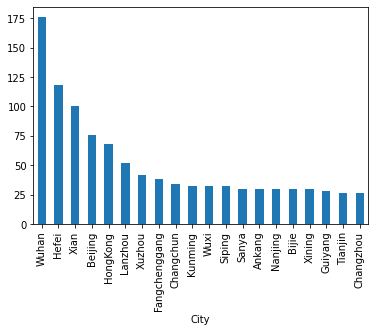

In [0]:
data10.plot(kind='bar')

Problem 11.

In [0]:
data['LivesInWuhan'].unique()

array(['TRUE', nan, 't', 'FALSE', 'f', 'F', 'T', '1', '0'], dtype=object)

In [0]:
data['LivesInWuhan'] = data['LivesInWuhan'].replace('TRUE', True)
data['LivesInWuhan'] = data['LivesInWuhan'].replace('True', True)
data['LivesInWuhan'] = data['LivesInWuhan'].replace('T', True)
data['LivesInWuhan'] = data['LivesInWuhan'].replace('t', True)
data['LivesInWuhan'] = data['LivesInWuhan'].replace('1', True)

data['LivesInWuhan'] = data['LivesInWuhan'].replace('FALSE', False)
data['LivesInWuhan'] = data['LivesInWuhan'].replace('False', False)
data['LivesInWuhan'] = data['LivesInWuhan'].replace('F', False)
data['LivesInWuhan'] = data['LivesInWuhan'].replace('f', False)
data['LivesInWuhan'] = data['LivesInWuhan'].replace('0', False)

In [0]:
data['LivesInWuhan'].unique()

array([True, nan, False], dtype=object)

In [0]:
data['ChronicDisease'].unique()

array(['TRUE', 'F', 'FALSE', '1', '0', 'f', 't', 'T', nan], dtype=object)

In [0]:
data['ChronicDisease'] = data['ChronicDisease'].replace('TRUE', True)
data['ChronicDisease'] = data['ChronicDisease'].replace('True', True)
data['ChronicDisease'] = data['ChronicDisease'].replace('T', True)
data['ChronicDisease'] = data['ChronicDisease'].replace('t', True)
data['ChronicDisease'] = data['ChronicDisease'].replace('1', True)

data['ChronicDisease'] = data['ChronicDisease'].replace('FALSE', False)
data['ChronicDisease'] = data['ChronicDisease'].replace('False', False)
data['ChronicDisease'] = data['ChronicDisease'].replace('F', False)
data['ChronicDisease'] = data['ChronicDisease'].replace('f', False)
data['ChronicDisease'] = data['ChronicDisease'].replace('0', False)

In [0]:
data['ChronicDisease'].unique()

array([True, False, nan], dtype=object)

In [0]:
data['Death'].unique()

array(['TRUE', nan, 'T'], dtype=object)

In [0]:
data['Death'] = data['Death'].replace('TRUE', True)
data['Death'] = data['Death'].replace('T', True)

In [0]:
data['Death'].unique()

array([True, nan], dtype=object)

Problem 12.

In [0]:
data12 = data[(data['LivesInWuhan']==True) & (data['Country']!='China')]
data12 = data12['Country'].value_counts()
data12 = data12.sort_values(ascending=False)
data12

Singapore             24
Japan                 20
Australia             12
UnitedArabEmirates     8
Canada                 4
Philippines            4
Thailand               4
SouthKorea             4
UnitedStates           2
Cambodia               2
India                  2
Malaysia               2
Nepal                  2
France                 2
Malta                  1
Name: Country, dtype: int64

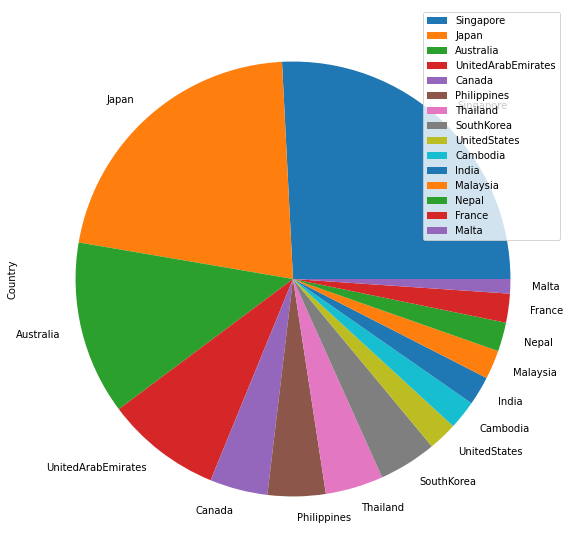

In [0]:
data12.plot.pie(figsize=(10,10), fontsize=10, legend=True)

Problem 13.

In [0]:
data13 = data.dropna(subset=['Age'])

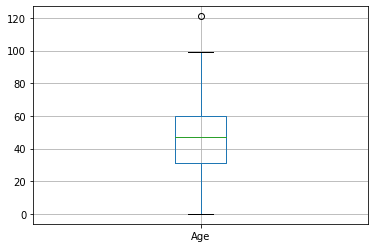

In [0]:
data13.boxplot(column='Age')

Problem 14.

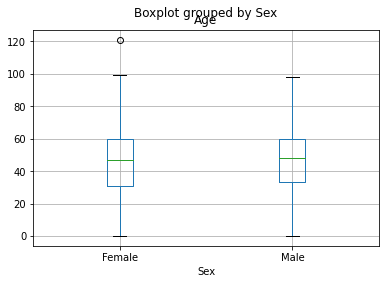

In [0]:
data13.boxplot(column='Age', by='Sex')

나이에 따른 남성과 여성 간 차이가 거의 존재 하지 않는 것 같다.

Problem 15.

In [0]:
data15 = data[data['Death']==True]
data15 = data15.groupby(by='Country').count()
data15 = data15[data15['Death']!=0]
data15 = data15['Death']
data15 = data15.sort_values(ascending=False)
data15

Country
Philippines     89
China           43
UnitedStates    16
France           1
Name: Death, dtype: int64

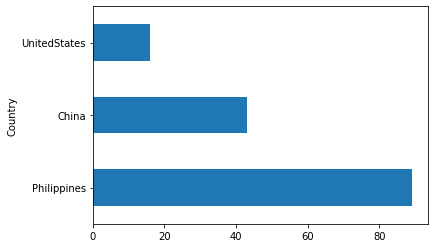

In [0]:
data15 = data15.head(3)
data15.plot(kind='barh')

Problem 16.

In [0]:
data16 = data[(data['Age']>=60) & (data['Age']<70)]
data16 = data16[data16['ChronicDisease']==True]
data16 = data16.groupby(by='Country')['ChronicDisease'].count()
data16 = data16.sort_values(ascending=False)
data16

Country
Singapore       36
UnitedStates    35
Philippines     26
SouthKorea      22
Canada           8
China            7
Brazil           6
Australia        6
Vietnam          2
Malta            2
Japan            2
Bolivia          2
Nigeria          1
Name: ChronicDisease, dtype: int64

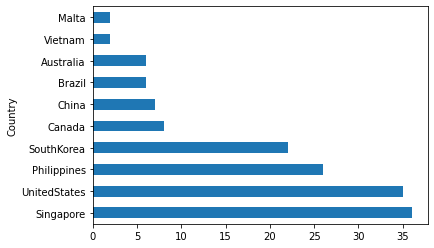

In [0]:
data16 = data16.head(10)
data16.plot(kind='barh')

Problem 17.

In [0]:
data17 = data.dropna(subset=['DateOfConfirmation'])
data17 = data17[data17['DateOfConfirmation'].str.contains('2020')]

month_1 = len(data17[data17['DateOfConfirmation'].str.slice(0,2)=='01'])
month_2 = len(data17[data17['DateOfConfirmation'].str.slice(0,2)=='02'])
month_3 = len(data17[data17['DateOfConfirmation'].str.slice(0,2)=='03'])

print('1월:', month_1)
print('2월:', month_2)
print('3월:', month_3)

1월: 1104
2월: 2289
3월: 12594


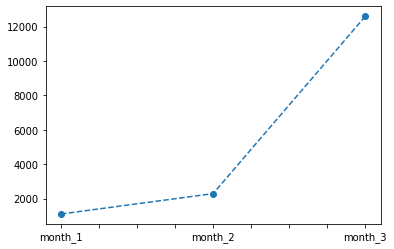

In [0]:
data_17 = pd.Series({'month_1':month_1,
                     'month_2':month_2,
                     'month_3':month_3})

data_17.plot(linestyle='dashed', marker='o')

Problem 18.

In [0]:
data18 = data.dropna(subset=['DateOfConfirmation'])
data18 = data18[data18['DateOfConfirmation'].str.contains('2020')]
data18 = data18[data18['DateOfConfirmation'].str.slice(0,2)=='02']

data18 = data18.groupby(by='Country')['DateOfConfirmation'].count()

print('2020년도 2월달에 코로나19 감염자로 확진된 중국, 한국, 미국의 환자 수')
print('중국:', data18['China'])
print('한국:', data18['SouthKorea'])
print('미국:', data18['UnitedStates'])

2020년도 2월달에 코로나19 감염자로 확진된 중국, 한국, 미국의 환자 수
중국: 1122
한국: 110
미국: 30


Problem 19.

In [0]:
data19 = data.dropna(subset=['DateOfConfirmation'])
data19 = data19[data19['DateOfConfirmation'].str.contains('2020')]

country_month_1 = data19[data19['DateOfConfirmation'].str.slice(0,2)=='01']
country_month_2 = data19[data19['DateOfConfirmation'].str.slice(0,2)=='02']
country_month_3 = data19[data19['DateOfConfirmation'].str.slice(0,2)=='03']

country_month_1 = country_month_1.groupby(by='Country')['DateOfConfirmation'].count()
country_month_2 = country_month_2.groupby(by='Country')['DateOfConfirmation'].count()
country_month_3 = country_month_3.groupby(by='Country')['DateOfConfirmation'].count()

country_month_1 = country_month_1.sort_values(ascending=False)
country_month_2 = country_month_2.sort_values(ascending=False)
country_month_3 = country_month_3.sort_values(ascending=False)

data_19 = pd.DataFrame({'month_1':country_month_1,
                       'month_2':country_month_2,
                       'month_3':country_month_3})

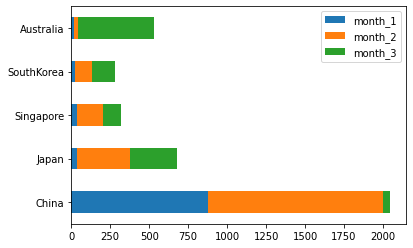

In [0]:
data_19_1 = data_19.sort_values(by='month_1', ascending=False)
data_19_1 = data_19_1.head(5)
data_19_1.plot(kind='barh', stacked=True)

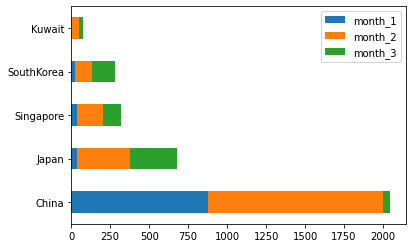

In [0]:
data_19_2 = data_19.sort_values(by='month_2', ascending=False)
data_19_2 = data_19_2.head(5)
data_19_2.plot(kind='barh', stacked=True)

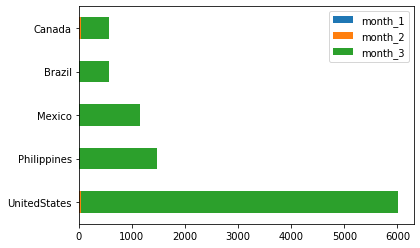

In [0]:
data_19_3 = data_19.sort_values(by='month_3', ascending=False)
data_19_3 = data_19_3.head(5)
data_19_3.plot(kind='barh', stacked=True)